# Read in the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
%pylab inline

titanic_df = pd.read_csv('input/titanic-data.csv')
titanic_df.head()


Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Data Dictionary

Variable	Definition	Key	
survival	Survival	0 = No, 1 = Yes	
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd	
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


# Variable Notes
pclass: A proxy for socio-economic status (SES)	
1st = Upper	
2nd = Middle	
3rd = Lower	

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5	

sibsp: The dataset defines family relations in this way...	
Sibling = brother, sister, stepbrother, stepsister	
Spouse = husband, wife (mistresses and fiancés were ignored)	

parch: The dataset defines family relations in this way...	
Parent = mother, father	
Child = daughter, son, stepdaughter, stepson	
Some children travelled only with a nanny, therefore parch=0 for them.	



In [4]:
#quote: some ideas to get you started:
#Titanic Data
#What factors made people more likely to survive?


# copy the correlation function in the class video.

def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    correlation = average of (x in standard units) times (y in standard units)
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    x_std = (x - x.mean() ) / x.std(ddof = 0)
    y_std = (y - y.mean() ) / y.std(ddof = 0)
    mean = (x_std * y_std).mean() 
    return mean


# and try to get the correlations 
pid = titanic_df['PassengerId']
survived = titanic_df['Survived']
pclass = titanic_df['Pclass']
name = titanic_df['Name']
sex = titanic_df['Sex']
age = titanic_df['Age']
sibsp = titanic_df['SibSp']
parch = titanic_df['Parch']
ticket = titanic_df['Ticket']
fare = titanic_df['Fare']
cabin = titanic_df['Cabin']
embarked = titanic_df['Embarked']




In [5]:
print(correlation(survived, pclass) )
# print(correlation(survived, name) )
# print(correlation(survived, sex) )
# Error. Now I know that I only correlate numerical datas.
print(correlation(survived, age) )
print(correlation(survived, sibsp) )
print(correlation(survived, parch) )
print(correlation(survived, fare) )



-0.33848103596101325
-0.077982678413863
-0.03532249888573573
0.08162940708348272
0.2573065223849616


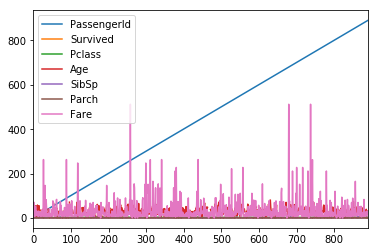

In [15]:
titanic_df.plot()

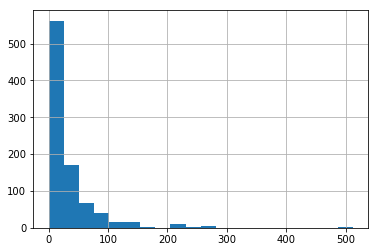

In [20]:
fare.hist(bins = 20)


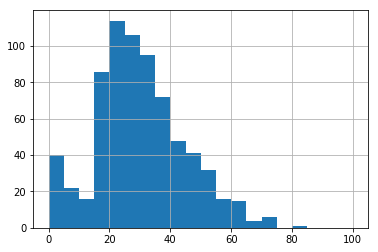

In [22]:
age.hist(bins = 20, range = (0,100) )

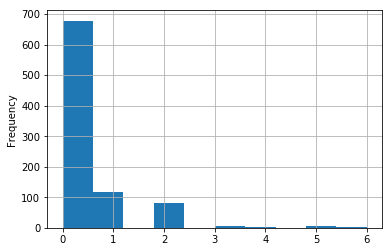

In [14]:

parch.plot(kind = 'hist', grid = True)


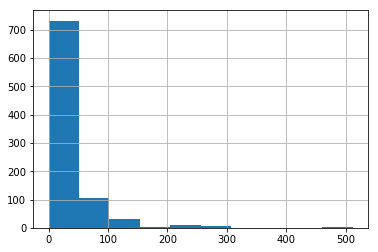

In [7]:
fare.hist()


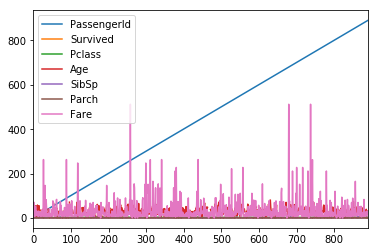